In [1]:
from sympy import init_session
from sympy import div, QQ, plot
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import numpy as np
import pandas as pd
    
# from sympy.geometry import Point, Line, Triangle
# from sympy.vector import CoordSys3D, vector


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'autoev33'
titulo = 'Final 3ª Ev.'
curso = '1BC'


x,y = symbols('x, y', real=True)

#from docfunc import *

import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
#style.use('seaborn-whitegrid')


%matplotlib inline

from sympy.calculus.util import continuous_domain
from sympy import solve_poly_inequality, reduce_abs_inequality, plot_implicit
from sympy.solvers.inequalities import solve_univariate_inequality, reduce_rational_inequalities

from sympy.stats import Binomial, density, Die, Coin, P, E, variance, Normal, FiniteRV
from sympy import E
# from sympy.functions.combinatorial.numbers import nC, nP, nT

IPython console for SymPy 1.4 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
def trozos(f):
    # Función que devuelve el extremo superior de los tramos, los límites laterales, y el valor de la función
    sol = []
    for i,s  in enumerate(f.args):
        if(i<len(f.args)-1):
            extremo = f.args[i][1].as_set().sup
            #display(extremo)
            #display(s)
            #display(limit(f.args[i][0],x,extremo, dir='-'))
            #display(limit(f.args[i][0],x,extremo, dir='+'))
            #display(f.subs(x,extremo))
            sol.append((extremo, limit(f.args[i][0],x,extremo, dir='-'), limit(f.args[i+1][0],x,extremo, dir='+'),f.subs(x,extremo)))        
    return sol    

def estudio(f) :
    # Estudio en una función a trozos
    
    set = S.Reals
    conj_singular = S.EmptySet
    for j, t in enumerate(f.args) :
        #display(singularities(t[0],x))
        #conj_singular = Union(conj_singular,singularities(t[0],x))
        #display(Union(conj_singular,singularities(t[0],x)))
        #conj_singular = Union(conj_singular,Complement(S.Reals,continuous_domain(t[0],x,S.Reals)))
        #conj_singular = Union(conj_singular,Intersection(t[1].as_set(),Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set2 = Intersection(set,t[1].as_set())
        conj_singular = Union(conj_singular,Intersection(set2,Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set = Complement(S.Reals,t[1].as_set())
        
    sol = r"Singularidades de las expresiones analíticas: $"+ latex(conj_singular)+"$"  
    sol += r".\\ Posibles discontinuidades en los extremos de los trozos:"

    xs = []
    estudio = []

    for j, t in enumerate(trozos(f)) :
        xs.append(str(t[0]))
        if (t[1]==t[2]) :
            estudio.append(r"\\En {} es continua ya que hay límite y $\lim = f({})={}$".format(t[0],t[0],t[3]))
            display(r"En $x_0={}$ hay límite y f({})={}".format(t[0],t[0],t[3]))
        else :
            estudio.append(r"\\En {} no es continua porque no existe límite. Límites laterales: ${}$ y ${}$".format(t[0], latex(t[1]), latex(t[2])))
            display(r"En {} no existe límite. Límites laterales: {} y  {}".format(t[0], t[1], t[2]))

    sol+=', '.join(xs)+r"."+'. '.join(estudio)
    return(sol)
    
    
def asintotas(f) :
    # Igual usar singularities mejor: asintotas, verticales, horizontales y oblícuas (a,b) en oo y -oo
    asint = []
    asintex = r'Asíntotas:\\'
    sing=EmptySet()
    for k in [(Intersection(j.boundary,j.complement(S.Reals))) for j in [i for i in list(continuous_domain(f,x,domain=S.Reals).args)]] :
            sing = sing + k
    list(sing)
    asint.append([(i,limit(f,x,i)) for i in list(sing)])
    asintex += ', '.join(r'A.V. $x='+str(i)+r'$\\' for i in list(sing))
#     asint.append([(i,limit(f,x,i)) for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals))])
#     asintex += ', '.join(r'A.V. $x='+str(i)+r'$\\' for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals)))
    if abs(limit(f,x,oo)) != oo:
        asintex += r'A.H. $y='+latex(limit(f,x,oo))+r'$\\'
    if abs(limit(f,x,-oo)) != oo:
        asintex += r'A.H. $y='+latex(limit(f,x,-oo))+r'$\\'
  
    asint.append([(oo,limit(f,x,oo)), (-oo,limit(f,x,-oo))])
    oblicuas=[]
    if abs(limit(f/x,x,oo)) != oo :
        oblicuas.append((oo,limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        #display(latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        asintex += r'A.O. $y='+latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo))+r'$ \\'
    if abs(limit(f/x,x,-oo)) != oo :
        oblicuas.append((-oo,limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo)))
        asintex += r'A.O. $y='+latex(limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo))+r'$ \\'
    asint.append(oblicuas)
    return asint,asintex

def crecimiento(f) :
    #crecimiento, decrecimiento y puntos singulares
    crec = reduce_rational_inequalities([[f.diff()>0]],x,relational=False)
    decrec = reduce_rational_inequalities([[f.diff()<0]],x,relational=False)
    sing = []
    for t in solve(f.diff()) :
        if f.diff().diff().subs(x,t) < 0 :
            tipo = 'máx'
        elif f.diff().diff().subs(x,t) > 0 :
            tipo = 'mín'
        else :
            tipo = 'inflex'      
        sing.append([t,tipo])

    sol=[crec,decrec,sing]

    return sol


def mi_plot(f, nombre='sin_nombre', xmax=10) :
        plt.rcParams['figure.figsize'] = 10,10
        #p1 = plot(f,show=True, xlim=(-xmax,xmax), ylim=(-xmax,xmax))
        
        #p1 = plot(f, xlim=(-xmax,xmax), ylim=(-xmax,xmax))
        p1 = plot_implicit(Eq(y,f),x_var=(x, -xmax, xmax), y_var=(y, -xmax, xmax))
        p1.save(nombre+".png")
#        p1.save("prueba.png")
        return r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (nombre)



In [3]:
def datos_cualitativa(lista):
    # Devuelve un diccionario para crear la probabilidad cuantitativa a partir del índice
    nplista = np.array(lista)
    total = nplista[:,1].astype(int).sum()
    lista_val = list(nplista[:,0])
    dic ={i:nplista[i,1].astype(int)/total for i,s in enumerate(nplista)}
    
    return dic,lista_val  

def extracciones(datos, remplazamiento=False) :
    #Devuelve diccionarios con las extracciones del primer conjunto
    diccionarios = []

    if remplazamiento is True : 
        extraccion = 0
    else :
        extraccion = 1


    diccionarios.append(datos_cualitativa(datos))

    for i in range(len(datos)):
        npdatos = np.array(datos)
        npdatos[i,1]=npdatos[i,1].astype(int) - extraccion
        diccionarios.append(datos_cualitativa(list(npdatos)))
        
    return diccionarios



In [4]:
asintotas((-x**2-x+3)/(x**2+x-2))

([[(-2, -oo), (1, oo)], [(oo, -1), (-oo, -1)], [(oo, -1), (-oo, -1)]],
 'Asíntotas:\\\\A.V. $x=-2$\\\\, A.V. $x=1$\\\\A.H. $y=-1$\\\\A.H. $y=-1$\\\\A.O. $y=-1$ \\\\A.O. $y=-1$ \\\\')

In [5]:
# Bayes

datos = [['morada','roja',3,2,4,4],['verde','blanca',6,2,4,4],['verde','blanca',3,2,4,4]]

for i,s in enumerate(datos):
    
    color1, color2, A1, A2, B1, B2 = s
    
    n_ejercicio = 'fin308-'+str(i)

    texto_ejercicio = r"""Se dispone de dos cajas, la caja A contiene {} bolas {}s y {} bolas {}s; mientras 
    que la caja B contiene {}
    bolas {}s y {} {}s.
    """.format(A1,color1,A2, color2, B1,color1,B2,color2)

    display(md("**"+texto_ejercicio+"**"))

    

    #datos = [[[color1,A1/At],[color2,A2/At]],[[color1,(B1+1)/(Bt+1)],[color2,(B2)/(Bt+1)]],[[color1,(B1)/(Bt+1)],[color2,(B2+1)/(Bt+1)]]]
    datos_dicc = [[color1,A1],[color2,A2]],[[color1,(B1+1)],[color2,(B2)]],[[color1,(B1)],[color2,(B2+1)]]
    datos_dicc2 = [['A',1],['B',1]],[[color1,A1],[color2,A2]],[[color1,(B1)],[color2,(B2)]]

#     texto_ejercicio = r"""Se dispone de dos cajas, la caja A contiene {} bolas {}s y {} bolas {}s; mientras que la caja B contiene 4
#     bolas {}s y 4 {}s.""".format(A1,color1,color2,color1,color2)



    diccionarios = [datos_cualitativa(datos_dicc[i]) for i,s  in enumerate(datos_dicc)]

    display(diccionarios)

    ini = FiniteRV('ini',density=diccionarios[0][0])
    si_1 = FiniteRV('si_1',density=diccionarios[1][0])
    si_2 = FiniteRV('si_2',density=diccionarios[2][0])

    display(density(ini).dict,density(si_1).dict,density(si_2).dict)

    enunciado_latex, enunciado, solucion = [],[],[]

    en = r"""Se escoge una bola cualquiera de la caja A y se pasa a la caja B. Posteriormente se saca una
    bola de la caja B. ¿Cuál es la probabilidad de que la bola extraída de la caja B sea {}?. """.format(color1) 

    enunciado_latex.append(en)
    enunciado.append(str(en))
    p1 = P(Eq(ini,0))*P(Eq(si_1,0))+P(Eq(ini,1))*P(Eq(si_2,0))

    sol = "$"+latex(nsimplify(P(Eq(ini,0))))
    sol += r"\cdot"+latex(nsimplify(P(Eq(si_1,0))))
    sol += r"+"+latex(nsimplify(P(Eq(ini,1))))
    sol += r"\cdot"+latex(nsimplify(P(Eq(si_2,0))))
    sol += "="+latex(nsimplify(p1))+"$"

    solucion.append(sol)

    display(md(""+ enunciado_latex[0] +" \\rightarrow " + solucion[0] +""))
    
    en2 = r"""Ahora volvemos a la situación original de las cajas. Seleccionamos una caja al azar y se saca una bola 
    que resulta ser {}. ¿Cuál es la probabilidad de que esa
    bola sea de la caja A?""".format(color2) 
    
    diccionarios = [datos_cualitativa(datos_dicc2[i]) for i,s  in enumerate(datos_dicc2)]
    ini = FiniteRV('ini',density=diccionarios[0][0])
    si_1 = FiniteRV('si_1',density=diccionarios[1][0])
    si_2 = FiniteRV('si_2',density=diccionarios[2][0])


    enunciado_latex.append(en2)
    enunciado.append(str(en2))
    p2 = P(Eq(ini,0))*P(Eq(si_1,1))/(P(Eq(ini,0))*P(Eq(si_1,1))+P(Eq(ini,1))*P(Eq(si_2,1)))
    sol = r"$\dfrac{"+latex(nsimplify(P(Eq(ini,0))))+r"\cdot"+latex(nsimplify(P(Eq(si_1,1))))
    sol += r"}{"+latex(nsimplify(P(Eq(ini,0))))+r"\cdot"+latex(nsimplify(P(Eq(si_1,1))))
    sol += r"+"+latex(nsimplify(P(Eq(ini,1))))+r"\cdot"+latex(nsimplify(P(Eq(si_2,1))))
    sol += r"}"
    sol += "="+latex(nsimplify(p2))+"$"
    solucion.append(sol)


    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**Se dispone de dos cajas, la caja A contiene 3 bolas moradas y 2 bolas rojas; mientras 
    que la caja B contiene 4
    bolas moradas y 4 rojas.
    **

[({0: 0.6, 1: 0.4}, ['morada', 'roja']),
 ({0: 0.5555555555555556, 1: 0.4444444444444444}, ['morada', 'roja']),
 ({0: 0.4444444444444444, 1: 0.5555555555555556}, ['morada', 'roja'])]

Se escoge una bola cualquiera de la caja A y se pasa a la caja B. Posteriormente se saca una
    bola de la caja B. ¿Cuál es la probabilidad de que la bola extraída de la caja B sea morada?.  \rightarrow $\frac{3}{5}\cdot\frac{5}{9}+\frac{2}{5}\cdot\frac{4}{9}=\frac{23}{45}$

**Se dispone de dos cajas, la caja A contiene 6 bolas verdes y 2 bolas blancas; mientras 
    que la caja B contiene 4
    bolas verdes y 4 blancas.
    **

[({0: 0.75, 1: 0.25}, ['verde', 'blanca']),
 ({0: 0.5555555555555556, 1: 0.4444444444444444}, ['verde', 'blanca']),
 ({0: 0.4444444444444444, 1: 0.5555555555555556}, ['verde', 'blanca'])]

Se escoge una bola cualquiera de la caja A y se pasa a la caja B. Posteriormente se saca una
    bola de la caja B. ¿Cuál es la probabilidad de que la bola extraída de la caja B sea verde?.  \rightarrow $\frac{3}{4}\cdot\frac{5}{9}+\frac{1}{4}\cdot\frac{4}{9}=\frac{19}{36}$

**Se dispone de dos cajas, la caja A contiene 3 bolas verdes y 2 bolas blancas; mientras 
    que la caja B contiene 4
    bolas verdes y 4 blancas.
    **

[({0: 0.6, 1: 0.4}, ['verde', 'blanca']),
 ({0: 0.5555555555555556, 1: 0.4444444444444444}, ['verde', 'blanca']),
 ({0: 0.4444444444444444, 1: 0.5555555555555556}, ['verde', 'blanca'])]

Se escoge una bola cualquiera de la caja A y se pasa a la caja B. Posteriormente se saca una
    bola de la caja B. ¿Cuál es la probabilidad de que la bola extraída de la caja B sea verde?.  \rightarrow $\frac{3}{5}\cdot\frac{5}{9}+\frac{2}{5}\cdot\frac{4}{9}=\frac{23}{45}$

In [6]:
# Bayes

texto = r"""Se dispone de dos cajas, la caja A contiene 3 bolas moradas y 2 bolas rojas; mientras que la caja B contiene 4
bolas moradas y 4 rojas . (0,75 puntos) Se escoge una bola cualquiera de la caja A y se pasa a la caja B. Posteriormente se saca una
bola de la caja B. ¿Cuál es la probabilidad de que la bola extraída de la caja B sea morada?. Ahora volvemos a la situación original de las cajas; la A contiene 3 moradas y 2 rojas y la B
contiene 4 moradas y 4 rojas .
Seleccionamos una caja al azar y se saca una bola que resulta ser roja. ¿Cuál es la probabilidad de que esa
bola sea de la caja A?"""

color1='morada'
color2='roja'
A1=3
A2=2
B1=4
B2=4


#datos = [[[color1,A1/At],[color2,A2/At]],[[color1,(B1+1)/(Bt+1)],[color2,(B2)/(Bt+1)]],[[color1,(B1)/(Bt+1)],[color2,(B2+1)/(Bt+1)]]]
datos = [[[color1,A1],[color2,A2]],[[color1,(B1+1)],[color2,(B2)]],[[color1,(B1)],[color2,(B2+1)]]]

texto_ejercicio = r"""Se dispone de dos cajas, la caja A contiene 3 bolas {}s y 2 bolas {}s; mientras que la caja B contiene 4
bolas {}s y 4 {}s . (0,75 puntos)  .
Ahora 
volvemos a la situación original de las cajas; la A contiene 3 moradas y 2 rojas y la B
contiene 4 moradas y 4 rojasSeleccionamos una caja al azar y se saca una bola que resulta ser roja. ¿Cuál es la probabilidad de que esa
bola sea de la caja A?""".format(color1,color2,color1,color2)

n_ejercicio = 'fin3-01'

display(md("**"+texto_ejercicio+"**"))

datos_cualitativa(datos[0])



diccionarios = [datos_cualitativa(datos[i]) for i,s  in enumerate(datos)]

display(diccionarios)

ini = FiniteRV('ini',density=diccionarios[0][0])
si_1 = FiniteRV('si_1',density=diccionarios[1][0])
si_2 = FiniteRV('si_2',density=diccionarios[2][0])

display(density(ini).dict,density(si_1).dict,density(si_2).dict)

enunciado_latex, enunciado, solucion = [],[],[]

en = r"""Se escoge una bola cualquiera de la caja A y se pasa a la caja B. Posteriormente se saca una
bola de la caja B. ¿Cuál es la probabilidad de que la bola extraída de la caja B sea {}?. """.format(color1) 

enunciado_latex.append(en)
enunciado = str(en)
p1 = P(Eq(ini,0))*P(Eq(si_1,0))+P(Eq(ini,1))*P(Eq(si_2,0))

sol = "$"+latex(nsimplify(P(Eq(ini,0))))
sol += r"\cdot"+latex(nsimplify(P(Eq(si_1,0))))
sol += r"+"+latex(nsimplify(P(Eq(ini,1))))
sol += r"\cdot"+latex(nsimplify(P(Eq(si_2,0))))
sol += "="+latex(nsimplify(p1))+"$"

solucion.append(sol)

# p2 = (P(Eq(ini,0))*P(Eq(si_1,0)))/(P(Eq(ini,0))*P(Eq(si_1,0))+P(Eq(ini,1))*P(Eq(si_2,0)))
# solucion.append(latex([nsimplify(p1),
#                        nsimplify(p2)
#                ]))

display(md(""+ enunciado_latex[0] +" \\rightarrow " + solucion[0] +""))

#df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**Se dispone de dos cajas, la caja A contiene 3 bolas moradas y 2 bolas rojas; mientras que la caja B contiene 4
bolas moradas y 4 rojas . (0,75 puntos)  .
Ahora 
volvemos a la situación original de las cajas; la A contiene 3 moradas y 2 rojas y la B
contiene 4 moradas y 4 rojasSeleccionamos una caja al azar y se saca una bola que resulta ser roja. ¿Cuál es la probabilidad de que esa
bola sea de la caja A?**

[({0: 0.6, 1: 0.4}, ['morada', 'roja']),
 ({0: 0.5555555555555556, 1: 0.4444444444444444}, ['morada', 'roja']),
 ({0: 0.4444444444444444, 1: 0.5555555555555556}, ['morada', 'roja'])]

Se escoge una bola cualquiera de la caja A y se pasa a la caja B. Posteriormente se saca una
bola de la caja B. ¿Cuál es la probabilidad de que la bola extraída de la caja B sea morada?.  \rightarrow $\frac{3}{5}\cdot\frac{5}{9}+\frac{2}{5}\cdot\frac{4}{9}=\frac{23}{45}$

Dada la función:$f(x)=\frac{x^{2} - 2 x + 1}{2 x + 3}$, calcular:

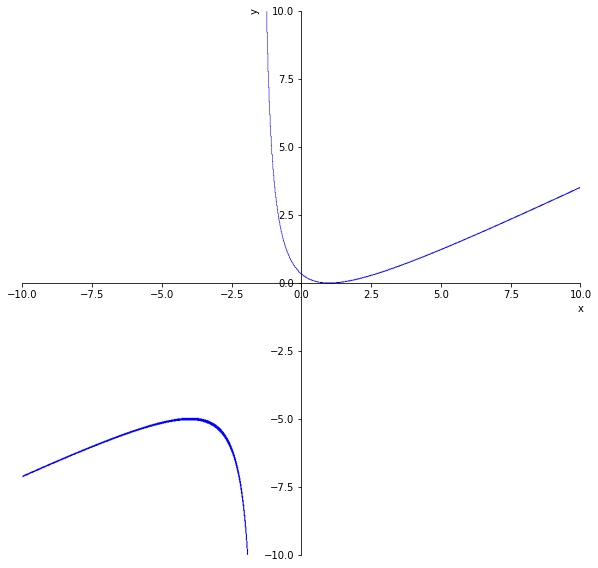

Dominio de $f(x)$ $ \rightarrow $$Dom(f)=\left(-\infty, - \frac{3}{2}\right) \cup \left(- \frac{3}{2}, \infty\right)$\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{fin301-0}}

Asíntotas verticales, horizontales y oblicuas, en caso que existan $ \rightarrow $Asíntotas:\\A.V. $x=-3/2$\\A.O. $y=\frac{x}{2} - \frac{7}{4}$ \\A.O. $y=\frac{x}{2} - \frac{7}{4}$ \\

Dada la función:$f(x)=\frac{- x^{2} - x + 3}{x^{2} + x - 2}$, calcular:

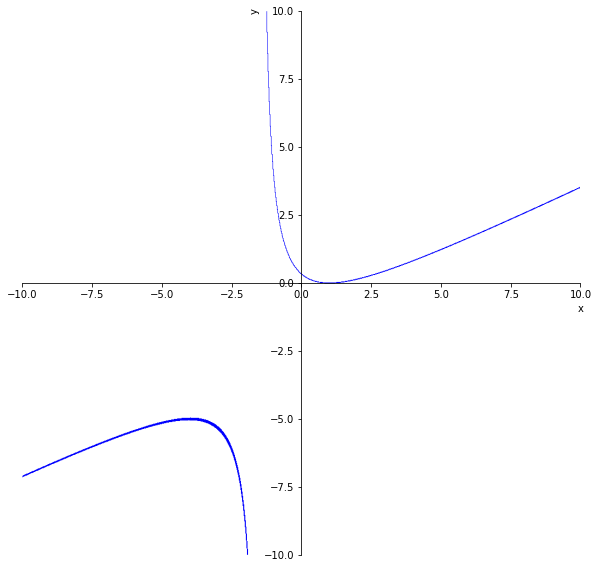

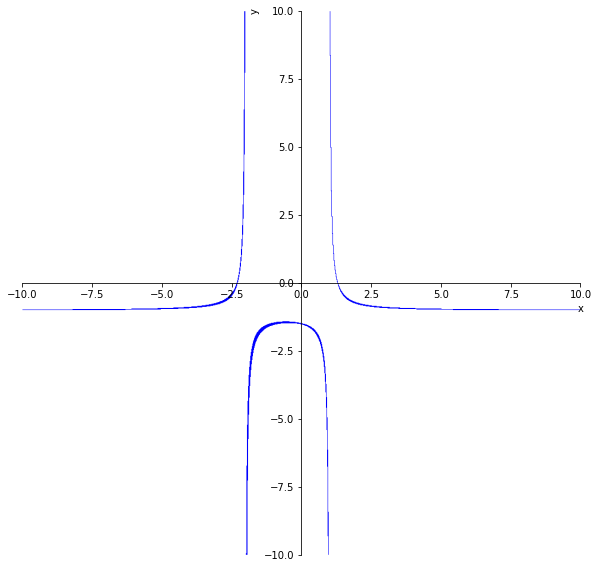

Dominio de $f(x)$ $ \rightarrow $$Dom(f)=\left(-\infty, -2\right) \cup \left(-2, 1\right) \cup \left(1, \infty\right)$\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{fin301-1}}

Asíntotas verticales, horizontales y oblicuas, en caso que existan $ \rightarrow $Asíntotas:\\A.V. $x=-2$\\, A.V. $x=1$\\A.H. $y=-1$\\A.H. $y=-1$\\A.O. $y=-1$ \\A.O. $y=-1$ \\

Dada la función:$f(x)=\sqrt{\frac{x}{x - 1}}$, calcular:

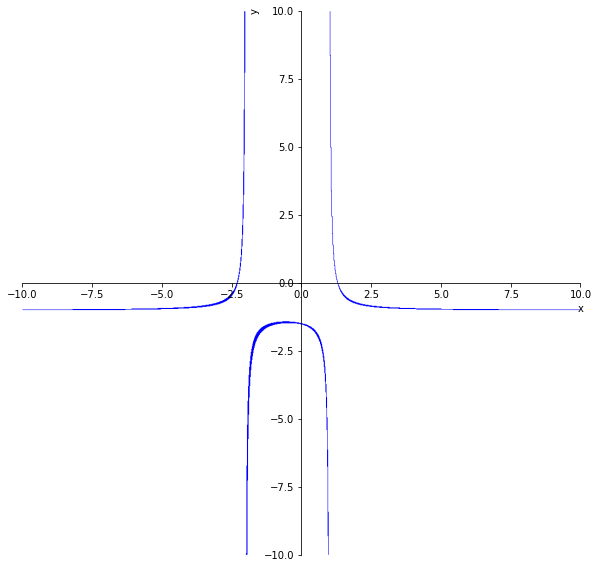

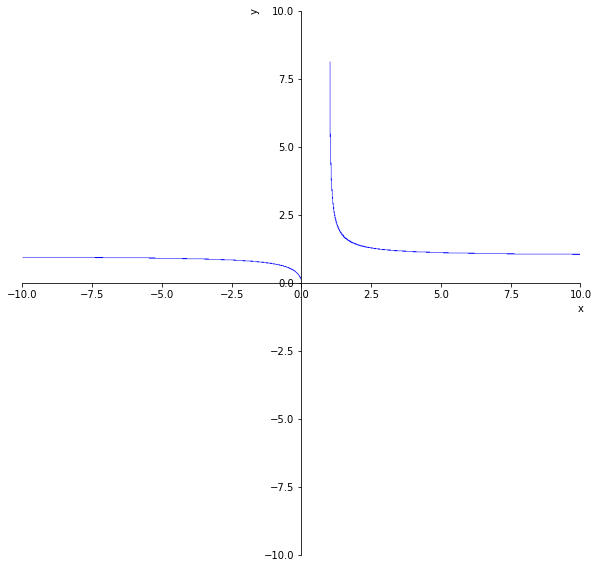

Dominio de $f(x)$ $ \rightarrow $$Dom(f)=\left(-\infty, 0\right] \cup \left(1, \infty\right)$\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{fin301-2}}

Asíntotas verticales, horizontales y oblicuas, en caso que existan $ \rightarrow $Asíntotas:\\A.V. $x=1$\\A.H. $y=1$\\A.H. $y=1$\\A.O. $y=1$ \\A.O. $y=1$ \\

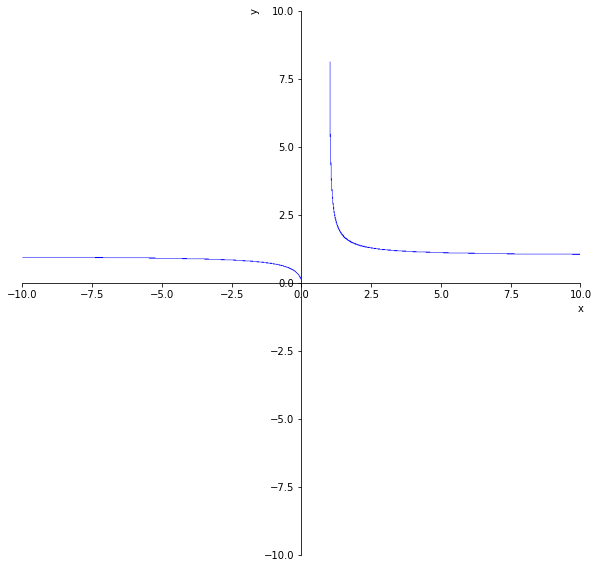

In [7]:
datos = [(x**2-2*x+1)/(2*x+3),(-x**2 - x + 3)/(x**2 + x - 2), sqrt(x/(x-1))]

for i, s in enumerate(datos) : 
    n_ejercicio = 'fin301-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    ejercicio=s
    texto_ejercicio = r"""Dada la función:$f(x)="""+latex(ejercicio)+"$, calcular:"
    
    display(md(texto_ejercicio))
    enun = r"Dominio de $f(x)$"
    enunciado_latex.append(enun)
    enunciado.append(enun)
    sol=r"$Dom(f)="+latex(continuous_domain(s,x,domain=S.Reals))+"$"
    sol+=mi_plot(s,n_ejercicio)
    display(md(enun +" $ \\rightarrow $" + sol ))                 
    solucion.append(latex(sol))
    #df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)

#     enun = r"¿Para qué valores de $x$ la función es creciente?"
#     enunciado_latex.append(enun)
#     enunciado.append(enun)
#     #sol=r"$"+latex(reduce_rational_inequalities([[s.diff()>0]],x,relational=False))+"$"
#     sol = r"$"+latex(crecimiento(s)[0])+"$"
#     display(md(enun +" $ \\rightarrow $" + sol ))                 
#     solucion.append(latex(sol))
#     #df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)

    enun = r"Asíntotas verticales, horizontales y oblicuas, en caso que existan"
    enunciado_latex.append(enun)
    enunciado.append(enun)
    sol=r""+(asintotas(s)[1])+""
    display(md(enun +" $ \\rightarrow $" + sol ))                 
    solucion.append((sol))
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)



In [8]:
datos = [
        Piecewise(((2*x**2+7*x+3)/(x**2-9),x<=-2),((sqrt(x+3)-1)/(x**2+2*x),x>-2)),
        Piecewise(((x**2-4)/(x**2-3*x+2),x<2),(4,x<5),(E**(x-5)+3,True)),
        ]

for i, s in enumerate(datos) : 
    n_ejercicio = 'fin302-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    ejercicio=s
    texto_ejercicio = r"""Estudia en qué puntos de $\mathbb{R}$ la función no es continua: """
    

    enun = r"$f(x)="+latex(ejercicio)+"$"
    display(md(texto_ejercicio+" "+enun))
    enunciado_latex.append(enun)
    enunciado.append(enun)
    sol=estudio(s)
    #sol+=mi_plot(s,n_ejercicio)
    display(md(enun +" $ \\rightarrow $" + sol ))                 
    solucion.append(latex(sol))
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)



Estudia en qué puntos de $\mathbb{R}$ la función no es continua:  $f(x)=\begin{cases} \frac{2 x^{2} + 7 x + 3}{x^{2} - 9} & \text{for}\: x \leq -2 \\\frac{\sqrt{x + 3} - 1}{x^{2} + 2 x} & \text{otherwise} \end{cases}$

'En -2 no existe límite. Límites laterales: 3/5 y  -1/4'

$f(x)=\begin{cases} \frac{2 x^{2} + 7 x + 3}{x^{2} - 9} & \text{for}\: x \leq -2 \\\frac{\sqrt{x + 3} - 1}{x^{2} + 2 x} & \text{otherwise} \end{cases}$ $ \rightarrow $Singularidades de las expresiones analíticas: $\left\{-3, 0\right\}$.\\ Posibles discontinuidades en los extremos de los trozos:-2.\\En -2 no es continua porque no existe límite. Límites laterales: $\frac{3}{5}$ y $- \frac{1}{4}$

Estudia en qué puntos de $\mathbb{R}$ la función no es continua:  $f(x)=\begin{cases} \frac{x^{2} - 4}{x^{2} - 3 x + 2} & \text{for}\: x < 2 \\4 & \text{for}\: x < 5 \\e^{x - 5} + 3 & \text{otherwise} \end{cases}$

'En $x_0=2$ hay límite y f(2)=4'

'En $x_0=5$ hay límite y f(5)=4'

$f(x)=\begin{cases} \frac{x^{2} - 4}{x^{2} - 3 x + 2} & \text{for}\: x < 2 \\4 & \text{for}\: x < 5 \\e^{x - 5} + 3 & \text{otherwise} \end{cases}$ $ \rightarrow $Singularidades de las expresiones analíticas: $\left\{1\right\}$.\\ Posibles discontinuidades en los extremos de los trozos:2, 5.\\En 2 es continua ya que hay límite y $\lim = f(2)=4$. \\En 5 es continua ya que hay límite y $\lim = f(5)=4$

In [9]:
datos = [
            [Piecewise((E**(x+2)+a,x<=-2),((1+x)/(3-x),x<1),(b*x+3,True))],
            [Piecewise((E**(x+3)+a,x<=-3),((2+x)/(4-x),x<1),(b*x+6,True))],
            
        ]

for i, s in enumerate(datos) : 
    n_ejercicio = 'fin303-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    ejercicio=s
    texto_ejercicio = r"""Halla a y b de modo que las siguientes funciones sean continuas:"""
    
    for j, t in enumerate(datos[i]):
        enunciado_latex.append(r'$$f(x)='+latex(t)+r'$$')
        enunciado.append(t)
        sol = solve([trozos(t)[0][1]-trozos(t)[0][2],trozos(t)[1][1]-trozos(t)[1][2]])
        solucion.append(r"$"+latex(sol)+r"$")
        display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))

#     dato = Piecewise((log(x),x<1),(a*x**2+b,True))
#     enunciado_latex.append(r'$$f(x)='+latex(dato)+r'$$')
#     enunciado.append(dato)
#     sol = solveset(trozos(dato)[0][1]-trozos(dato)[0][2],a)
#     solucion.append(r"$"+latex(sol)+r"$")
    
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)


$$f(x)=\begin{cases} a + e^{x + 2} & \text{for}\: x \leq -2 \\\frac{x + 1}{3 - x} & \text{for}\: x < 1 \\b x + 3 & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{ a : - \frac{6}{5}, \  b : -2\right\}$

$$f(x)=\begin{cases} a + e^{x + 3} & \text{for}\: x \leq -3 \\\frac{x + 2}{4 - x} & \text{for}\: x < 1 \\b x + 6 & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{ a : - \frac{8}{7}, \  b : -5\right\}$

In [10]:
datos = [
            [
            [(3*x**2 - 11*x + 6)/(x**3 - 3*x**2 + x - 3),3],
            [E**(1-x),oo],
            [(x**3 + x**2 - x + 2)/(x**2 + 4*x + 4),-2],
            [((x**3-4)/(x**2))**(1/(x-2)),2],
    
            ],
            [
            [(x**3 - 2*x**2 + 2*x - 4)/(3*x**2 - 8*x + 4),2],
            [1/(E**(1-x)),-oo],    
            [(x**3 + 1)/(x**2 + 2*x + 1),-1],
            [((x**2-x)/(x+3))**(1/(x-3)),3],
  
            ]
            
        ]

for i, s in enumerate(datos) : 
    n_ejercicio = 'fin304-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    
    texto_ejercicio = r"""Calcula los siguientes límites:"""
    display(md("**"+texto_ejercicio+"**"))

    for j, t in enumerate(datos[i]):
        enunciado_latex.append(r'$$'+latex(Limit(t[0],x,t[1],dir='+-'))+r'$$')
        enunciado.append(Limit(t[0],x,t[1],dir='+-'))


        if  limit(t[0],x,t[1],dir='-') == limit(t[0],x,t[1],dir='+'):      
            sol=r"$"+latex(limit(t[0],x,t[1],dir='+-'))+r"$"
        else:
            sol = r"No existe el límite"

        solucion.append(sol)
        display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '3', enun_tex=False, sol_tex=False), ignore_index=True)


**Calcula los siguientes límites:**

$$\lim_{x \to 3}\left(\frac{3 x^{2} - 11 x + 6}{x^{3} - 3 x^{2} + x - 3}\right)$$ $ \rightarrow $$\frac{7}{10}$

$$\lim_{x \to \infty} e^{1 - x}$$ $ \rightarrow $$0$

$$\lim_{x \to -2}\left(\frac{x^{3} + x^{2} - x + 2}{x^{2} + 4 x + 4}\right)$$ $ \rightarrow $No existe el límite

$$\lim_{x \to 2} \left(\frac{x^{3} - 4}{x^{2}}\right)^{\frac{1}{x - 2}}$$ $ \rightarrow $$e^{2}$

**Calcula los siguientes límites:**

$$\lim_{x \to 2}\left(\frac{x^{3} - 2 x^{2} + 2 x - 4}{3 x^{2} - 8 x + 4}\right)$$ $ \rightarrow $$\frac{3}{2}$

$$\lim_{x \to -\infty} e^{x - 1}$$ $ \rightarrow $$0$

$$\lim_{x \to -1}\left(\frac{x^{3} + 1}{x^{2} + 2 x + 1}\right)$$ $ \rightarrow $No existe el límite

$$\lim_{x \to 3} \left(\frac{x^{2} - x}{x + 3}\right)^{\frac{1}{x - 3}}$$ $ \rightarrow $$e^{\frac{2}{3}}$

In [11]:
datos = [
            [(3*x**2-2*x+1)/((x-1)**2),
             sqrt(1+sqrt(x)),
             log(x**2)/x,
             3*sin(cos(2*x))
            
           ],
            [(2*x**2-2*x+1)/((x-1)**2),
             sqrt(2-sqrt(x)),
             log(x)/x,
             2*cos(sin(2*x))
            ]
            
        ]

for i, s in enumerate(datos) : 
    n_ejercicio = 'fin305-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    
    texto_ejercicio = r"""Deriva las siguientes funciones (simplificando el resultado al máximo):"""
    display(md("**"+texto_ejercicio+"**"))

    for j, t in enumerate(datos[i]):
        enunciado_latex.append(r'$y='+latex(S(t,evaluate=False))+r'$')
        enunciado.append(r'diff('+str(nsimplify(S(t)))+r')')
        #display(S(t),diff(S(t)))
        sol=r"$y'="+latex(simplify(diff(S(t))))+r"$"
        solucion.append(sol)
        display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))

    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '3', enun_tex=False, sol_tex=False), ignore_index=True)


**Deriva las siguientes funciones (simplificando el resultado al máximo):**

$y=\frac{3 x^{2} - 2 x + 1}{\left(x - 1\right)^{2}}$ $ \rightarrow $$y'=- \frac{4 x}{x^{3} - 3 x^{2} + 3 x - 1}$

$y=\sqrt{\sqrt{x} + 1}$ $ \rightarrow $$y'=\frac{1}{4 \sqrt{x} \sqrt{\sqrt{x} + 1}}$

$y=\frac{\log{\left(x^{2} \right)}}{x}$ $ \rightarrow $$y'=\frac{2 - \log{\left(x^{2} \right)}}{x^{2}}$

$y=3 \sin{\left(\cos{\left(2 x \right)} \right)}$ $ \rightarrow $$y'=- 6 \sin{\left(2 x \right)} \cos{\left(\cos{\left(2 x \right)} \right)}$

**Deriva las siguientes funciones (simplificando el resultado al máximo):**

$y=\frac{2 x^{2} - 2 x + 1}{\left(x - 1\right)^{2}}$ $ \rightarrow $$y'=- \frac{2 x}{x^{3} - 3 x^{2} + 3 x - 1}$

$y=\sqrt{2 - \sqrt{x}}$ $ \rightarrow $$y'=- \frac{1}{4 \sqrt{x} \sqrt{2 - \sqrt{x}}}$

$y=\frac{\log{\left(x \right)}}{x}$ $ \rightarrow $$y'=\frac{1 - \log{\left(x \right)}}{x^{2}}$

$y=2 \cos{\left(\sin{\left(2 x \right)} \right)}$ $ \rightarrow $$y'=- 4 \sin{\left(\sin{\left(2 x \right)} \right)} \cos{\left(2 x \right)}$

In [12]:
df_ejercicios.to_csv('ejercicios_final3.csv', index = False)

In [13]:
df_ejercicios = pd.read_csv('ejercicios_final3.csv', index_col= None)

In [14]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Se escoge una bola cualquiera de la caja A y s...,Se escoge una bola cualquiera de la caja A y s...,$\frac{3}{5}\cdot\frac{5}{9}+\frac{2}{5}\cdot\...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-0,1,1,1,False,False
1,Ahora volvemos a la situación original de las ...,Ahora volvemos a la situación original de las ...,$\dfrac{\frac{1}{2}\cdot\frac{2}{5}}{\frac{1}{...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-0,1,1,1,False,False
2,Se escoge una bola cualquiera de la caja A y s...,Se escoge una bola cualquiera de la caja A y s...,$\frac{3}{4}\cdot\frac{5}{9}+\frac{1}{4}\cdot\...,"Se dispone de dos cajas, la caja A contiene 6 ...",1BC,Final 3ª Ev.,fin308-1,1,1,1,False,False
3,Ahora volvemos a la situación original de las ...,Ahora volvemos a la situación original de las ...,$\dfrac{\frac{1}{2}\cdot\frac{1}{4}}{\frac{1}{...,"Se dispone de dos cajas, la caja A contiene 6 ...",1BC,Final 3ª Ev.,fin308-1,1,1,1,False,False
4,Se escoge una bola cualquiera de la caja A y s...,Se escoge una bola cualquiera de la caja A y s...,$\frac{3}{5}\cdot\frac{5}{9}+\frac{2}{5}\cdot\...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-2,1,1,1,False,False
5,Ahora volvemos a la situación original de las ...,Ahora volvemos a la situación original de las ...,$\dfrac{\frac{1}{2}\cdot\frac{2}{5}}{\frac{1}{...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-2,1,1,1,False,False
6,Dominio de $f(x)$,Dominio de $f(x)$,"$Dom(f)=\left(-\infty, - \frac{3}{2}\right) \c...",Dada la función:$f(x)=\frac{x^{2} - 2 x + 1}{2...,1BC,Final 3ª Ev.,fin301-0,5,1,1,False,False
7,"Asíntotas verticales, horizontales y oblicuas,...","Asíntotas verticales, horizontales y oblicuas,...",Asíntotas:\\A.V. $x=-3/2$\\A.O. $y=\frac{x}{2}...,Dada la función:$f(x)=\frac{x^{2} - 2 x + 1}{2...,1BC,Final 3ª Ev.,fin301-0,5,1,1,False,False
8,Dominio de $f(x)$,Dominio de $f(x)$,"$Dom(f)=\left(-\infty, -2\right) \cup \left(-2...",Dada la función:$f(x)=\frac{- x^{2} - x + 3}{x...,1BC,Final 3ª Ev.,fin301-1,5,1,1,False,False
9,"Asíntotas verticales, horizontales y oblicuas,...","Asíntotas verticales, horizontales y oblicuas,...","Asíntotas:\\A.V. $x=-2$\\, A.V. $x=1$\\A.H. $y...",Dada la función:$f(x)=\frac{- x^{2} - x + 3}{x...,1BC,Final 3ª Ev.,fin301-1,5,1,1,False,False


In [15]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **fin301-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
6,Dominio de $f(x)$,Dominio de $f(x)$,"$Dom(f)=\left(-\infty, - \frac{3}{2}\right) \c...",Dada la función:$f(x)=\frac{x^{2} - 2 x + 1}{2...,1BC,Final 3ª Ev.,fin301-0,5,1,1,False,False
7,"Asíntotas verticales, horizontales y oblicuas,...","Asíntotas verticales, horizontales y oblicuas,...",Asíntotas:\\A.V. $x=-3/2$\\A.O. $y=\frac{x}{2}...,Dada la función:$f(x)=\frac{x^{2} - 2 x + 1}{2...,1BC,Final 3ª Ev.,fin301-0,5,1,1,False,False


**Ejercicio: **fin301-1

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
8,Dominio de $f(x)$,Dominio de $f(x)$,"$Dom(f)=\left(-\infty, -2\right) \cup \left(-2...",Dada la función:$f(x)=\frac{- x^{2} - x + 3}{x...,1BC,Final 3ª Ev.,fin301-1,5,1,1,False,False
9,"Asíntotas verticales, horizontales y oblicuas,...","Asíntotas verticales, horizontales y oblicuas,...","Asíntotas:\\A.V. $x=-2$\\, A.V. $x=1$\\A.H. $y...",Dada la función:$f(x)=\frac{- x^{2} - x + 3}{x...,1BC,Final 3ª Ev.,fin301-1,5,1,1,False,False


**Ejercicio: **fin301-2

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
10,Dominio de $f(x)$,Dominio de $f(x)$,"$Dom(f)=\left(-\infty, 0\right] \cup \left(1, ...","Dada la función:$f(x)=\sqrt{\frac{x}{x - 1}}$,...",1BC,Final 3ª Ev.,fin301-2,5,1,1,False,False
11,"Asíntotas verticales, horizontales y oblicuas,...","Asíntotas verticales, horizontales y oblicuas,...",Asíntotas:\\A.V. $x=1$\\A.H. $y=1$\\A.H. $y=1$...,"Dada la función:$f(x)=\sqrt{\frac{x}{x - 1}}$,...",1BC,Final 3ª Ev.,fin301-2,5,1,1,False,False


**Ejercicio: **fin302-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
12,$f(x)=\begin{cases} \frac{2 x^{2} + 7 x + 3}{x...,$f(x)=\begin{cases} \frac{2 x^{2} + 7 x + 3}{x...,Singularidades de las expresiones analíticas: ...,Estudia en qué puntos de $\mathbb{R}$ la funci...,1BC,Final 3ª Ev.,fin302-0,5,1,1,False,False


**Ejercicio: **fin302-1

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
13,$f(x)=\begin{cases} \frac{x^{2} - 4}{x^{2} - 3...,$f(x)=\begin{cases} \frac{x^{2} - 4}{x^{2} - 3...,Singularidades de las expresiones analíticas: ...,Estudia en qué puntos de $\mathbb{R}$ la funci...,1BC,Final 3ª Ev.,fin302-1,5,1,1,False,False


**Ejercicio: **fin303-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
14,$$f(x)=\begin{cases} a + e^{x + 2} & \text{for...,"Piecewise((a + exp(x + 2), x <= -2), ((x + 1)/...","$\left\{ a : - \frac{6}{5}, \ b : -2\right\}$",Halla a y b de modo que las siguientes funcion...,1BC,Final 3ª Ev.,fin303-0,5,1,1,False,False


**Ejercicio: **fin303-1

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
15,$$f(x)=\begin{cases} a + e^{x + 3} & \text{for...,"Piecewise((a + exp(x + 3), x <= -3), ((x + 2)/...","$\left\{ a : - \frac{8}{7}, \ b : -5\right\}$",Halla a y b de modo que las siguientes funcion...,1BC,Final 3ª Ev.,fin303-1,5,1,1,False,False


**Ejercicio: **fin304-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
16,$$\lim_{x \to 3}\left(\frac{3 x^{2} - 11 x + 6...,Limit((3*x**2 - 11*x + 6)/(x**3 - 3*x**2 + x -...,$\frac{7}{10}$,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-0,5,3,1,False,False
17,$$\lim_{x \to \infty} e^{1 - x}$$,"Limit(exp(1 - x), x, oo, dir='-')",$0$,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-0,5,3,1,False,False
18,$$\lim_{x \to -2}\left(\frac{x^{3} + x^{2} - x...,"Limit((x**3 + x**2 - x + 2)/(x**2 + 4*x + 4), ...",No existe el límite,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-0,5,3,1,False,False
19,$$\lim_{x \to 2} \left(\frac{x^{3} - 4}{x^{2}}...,"Limit(((x**3 - 4)/x**2)**(1/(x - 2)), x, 2, di...",$e^{2}$,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-0,5,3,1,False,False


**Ejercicio: **fin304-1

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
20,$$\lim_{x \to 2}\left(\frac{x^{3} - 2 x^{2} + ...,Limit((x**3 - 2*x**2 + 2*x - 4)/(3*x**2 - 8*x ...,$\frac{3}{2}$,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-1,5,3,1,False,False
21,$$\lim_{x \to -\infty} e^{x - 1}$$,"Limit(exp(x - 1), x, -oo)",$0$,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-1,5,3,1,False,False
22,$$\lim_{x \to -1}\left(\frac{x^{3} + 1}{x^{2} ...,"Limit((x**3 + 1)/(x**2 + 2*x + 1), x, -1, dir=...",No existe el límite,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-1,5,3,1,False,False
23,$$\lim_{x \to 3} \left(\frac{x^{2} - x}{x + 3}...,"Limit(((x**2 - x)/(x + 3))**(1/(x - 3)), x, 3,...",$e^{\frac{2}{3}}$,Calcula los siguientes límites:,1BC,Final 3ª Ev.,fin304-1,5,3,1,False,False


**Ejercicio: **fin305-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
24,$y=\frac{3 x^{2} - 2 x + 1}{\left(x - 1\right)...,diff((3*x**2 - 2*x + 1)/(x - 1)**2),$y'=- \frac{4 x}{x^{3} - 3 x^{2} + 3 x - 1}$,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-0,5,3,1,False,False
25,$y=\sqrt{\sqrt{x} + 1}$,diff(sqrt(sqrt(x) + 1)),$y'=\frac{1}{4 \sqrt{x} \sqrt{\sqrt{x} + 1}}$,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-0,5,3,1,False,False
26,$y=\frac{\log{\left(x^{2} \right)}}{x}$,diff(log(x**2)/x),$y'=\frac{2 - \log{\left(x^{2} \right)}}{x^{2}}$,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-0,5,3,1,False,False
27,$y=3 \sin{\left(\cos{\left(2 x \right)} \right)}$,diff(3*sin(cos(2*x))),$y'=- 6 \sin{\left(2 x \right)} \cos{\left(\co...,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-0,5,3,1,False,False


**Ejercicio: **fin305-1

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
28,$y=\frac{2 x^{2} - 2 x + 1}{\left(x - 1\right)...,diff((2*x**2 - 2*x + 1)/(x - 1)**2),$y'=- \frac{2 x}{x^{3} - 3 x^{2} + 3 x - 1}$,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-1,5,3,1,False,False
29,$y=\sqrt{2 - \sqrt{x}}$,diff(sqrt(2 - sqrt(x))),$y'=- \frac{1}{4 \sqrt{x} \sqrt{2 - \sqrt{x}}}$,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-1,5,3,1,False,False
30,$y=\frac{\log{\left(x \right)}}{x}$,diff(log(x)/x),$y'=\frac{1 - \log{\left(x \right)}}{x^{2}}$,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-1,5,3,1,False,False
31,$y=2 \cos{\left(\sin{\left(2 x \right)} \right)}$,diff(2*cos(sin(2*x))),$y'=- 4 \sin{\left(\sin{\left(2 x \right)} \ri...,Deriva las siguientes funciones (simplificando...,1BC,Final 3ª Ev.,fin305-1,5,3,1,False,False


**Ejercicio: **fin308-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Se escoge una bola cualquiera de la caja A y s...,Se escoge una bola cualquiera de la caja A y s...,$\frac{3}{5}\cdot\frac{5}{9}+\frac{2}{5}\cdot\...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-0,1,1,1,False,False
1,Ahora volvemos a la situación original de las ...,Ahora volvemos a la situación original de las ...,$\dfrac{\frac{1}{2}\cdot\frac{2}{5}}{\frac{1}{...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-0,1,1,1,False,False


**Ejercicio: **fin308-1

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
2,Se escoge una bola cualquiera de la caja A y s...,Se escoge una bola cualquiera de la caja A y s...,$\frac{3}{4}\cdot\frac{5}{9}+\frac{1}{4}\cdot\...,"Se dispone de dos cajas, la caja A contiene 6 ...",1BC,Final 3ª Ev.,fin308-1,1,1,1,False,False
3,Ahora volvemos a la situación original de las ...,Ahora volvemos a la situación original de las ...,$\dfrac{\frac{1}{2}\cdot\frac{1}{4}}{\frac{1}{...,"Se dispone de dos cajas, la caja A contiene 6 ...",1BC,Final 3ª Ev.,fin308-1,1,1,1,False,False


**Ejercicio: **fin308-2

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
4,Se escoge una bola cualquiera de la caja A y s...,Se escoge una bola cualquiera de la caja A y s...,$\frac{3}{5}\cdot\frac{5}{9}+\frac{2}{5}\cdot\...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-2,1,1,1,False,False
5,Ahora volvemos a la situación original de las ...,Ahora volvemos a la situación original de las ...,$\dfrac{\frac{1}{2}\cdot\frac{2}{5}}{\frac{1}{...,"Se dispone de dos cajas, la caja A contiene 3 ...",1BC,Final 3ª Ev.,fin308-2,1,1,1,False,False
